In [1]:
from sklearn.datasets import fetch_openml
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from models import *

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = False)
y = y.astype(np.int)

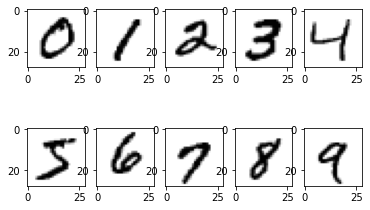

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
showMnistExamples(X, y,0)

In [4]:
model = LogisticRegression(penalty='l1', solver='saga', max_iter=100, tol=1)
mc = MNISTClassifier(model, X_train, y_train, X_test, y_test)

In [5]:
print(mc.modelScore)

0.9098857142857143


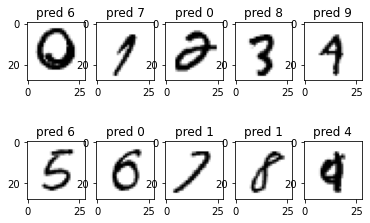

In [8]:
mc.showWrongOnes(2)